# LIBRARIES


In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, roc_auc_score,mean_squared_error,f1_score 


import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
import seaborn as sb
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, KFold
from numpy import loadtxt
from xgboost import XGBClassifier
import sys
sys.path.append("../")
import os

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
baseline_gbm= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/BaseLines/GBM/gbm_Results.xlsx")
baseline_lr= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/BaseLines/LogReg/LR_Results.xlsx")

#dir level 1
dir_gbm=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_1/GBM/gbm_Results.xlsx")
dir_lr= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_1/LogReg/LR_Results.xlsx")

#reweighing
rw_gbm=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Reweighing/GBM/gbm_Results.xlsx")
rw_lr= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Reweighing/LogReg/LR_Results.xlsx")

#lfr
lfr_gbm=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/LFR/NewLFR_Results/gbm_Results.xlsx")
lfr_lr= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/LFR/NewLFR_Results/LR_Results.xlsx")

#Adversarial Debiasing
AdDeb= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/AdDeb/AdDeb.xlsx")

#PRemover
PRemover=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/PRemover/PRemover100.xlsx")

#Equal Odds
EO_gbm=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/EqualOdds/EO_gbm.xlsx")
EO_lr=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/EqualOdds/EO_LogReg.xlsx")

#CalEqual Odds
CalEO_gbm=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/CalEqualOdds/CalEO_gbm.xlsx")
CalEO_lr=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/CalEqualOdds/CalEO_LogReg.xlsx")


#varying levels of dir repair
#level 0
dir_gbm_0=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p0/GBM/gbm_Results.xlsx")
dir_lr_0= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p0/LogReg/LR_Results.xlsx")

#level 0.3
dir_gbm_3=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p3/GBM/gbm_Results.xlsx")
dir_lr_3= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p3/LogReg/LR_Results.xlsx")
#level 0.5
dir_gbm_5=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p5/GBM/gbm_Results.xlsx")
dir_lr_5= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p5/LogReg/LR_Results.xlsx")

#level 0.7
dir_gbm_7=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p7/GBM/gbm_Results.xlsx")
dir_lr_7= pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/DIR/level_p7/LogReg/LR_Results.xlsx")


#PRemover at other values
PRemover75=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/PRemover/PRemover75.xlsx")
PRemover50=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/PRemover/PRemover50.xlsx")
PRemover25=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/PRemover/PRemover25.xlsx")
PRemover1=pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/PRemover/PRemover1.xlsx")

#Meta Classifier at various values
Meta0 = pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Meta/Meta0.xlsx")
Meta2 = pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Meta/Meta2.xlsx")
Meta4 = pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Meta/Meta4.xlsx")
Meta6 = pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Meta/Meta6.xlsx")
Meta8 = pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Meta/Meta8.xlsx")
Meta1 = pd.ExcelFile(r"/content/gdrive/MyDrive/Datasets/SurveyData/RESULTS/Meta/Meta10.xlsx")

# METRICS

We put together various metrics for fairness accuracy trade-off

In [4]:
#baselines
German_gbm_baseline=pd.read_excel(baseline_gbm, sheet_name="German")[51:52].reset_index()
German_gbm_baseline_std= pd.read_excel(baseline_gbm, sheet_name="German")[52:53].add_suffix('_std').reset_index()
#avg and std together
German_gbm_baseline= pd.concat([German_gbm_baseline,German_gbm_baseline_std], axis=1).drop('index',axis=1) #reset index adds and index column

#logistic regression
German_lr_baseline= pd.read_excel(baseline_lr, sheet_name="German")[51:52].reset_index()
German_lr_baseline_std= pd.read_excel(baseline_lr, sheet_name="German")[52:53].add_suffix('_std').reset_index()
#avg and std together
German_lr_baseline= pd.concat([German_lr_baseline,German_lr_baseline_std], axis=1).drop('index',axis=1)




In [5]:
# #disparate impact remover
German_gbm_dir=pd.read_excel(dir_gbm, sheet_name="German")[51:52].reset_index()
German_gbm_dir_std= pd.read_excel(dir_gbm, sheet_name="German")[52:53].add_suffix('_std').reset_index()
#avg and std together
German_gbm_dir= pd.concat([German_gbm_dir,German_gbm_dir_std], axis=1).drop('index',axis=1)

#logistic regression
German_lr_dir= pd.read_excel(dir_lr, sheet_name="German")[51:52].reset_index()
German_lr_dir_std= pd.read_excel(dir_lr, sheet_name="German")[52:53].add_suffix('_std').reset_index()
#avg and std together
German_lr_dir= pd.concat([German_lr_dir,German_lr_dir_std], axis=1).drop('index',axis=1)


In [6]:
# #reweighing
German_gbm_rw=pd.read_excel(rw_gbm, sheet_name="German")[51:52].reset_index()
German_gbm_rw_std= pd.read_excel(rw_gbm, sheet_name="German")[52:53].add_suffix('_std').reset_index()
#avg and std together
German_gbm_rw= pd.concat([German_gbm_rw,German_gbm_rw_std], axis=1).drop('index',axis=1)

#logistic regression
German_lr_rw= pd.read_excel(rw_lr, sheet_name="German")[51:52].reset_index()
German_lr_rw_std= pd.read_excel(rw_lr, sheet_name="German")[52:53].add_suffix('_std').reset_index()
#avg and std together
German_lr_rw= pd.concat([German_lr_rw,German_lr_rw_std], axis=1).drop('index',axis=1)

In [7]:
# lfr
German_gbm_lfr=pd.read_excel(lfr_gbm, sheet_name="German")[51:52].reset_index()
German_gbm_lfr_std= pd.read_excel(lfr_gbm, sheet_name="German")[52:53].add_suffix('_std').reset_index()
#avg and std together
German_gbm_lfr= pd.concat([German_gbm_lfr,German_gbm_lfr_std], axis=1).drop('index',axis=1)

#logistic regression
German_lr_lfr= pd.read_excel(lfr_lr, sheet_name="German")[51:52].reset_index()
German_lr_lfr_std= pd.read_excel(lfr_lr, sheet_name="German")[52:53].add_suffix('_std').reset_index()
#avg and std together
German_lr_lfr= pd.concat([German_lr_lfr,German_lr_lfr_std], axis=1).drop('index',axis=1)

In [8]:
#Prejudice Remover
German_pr_remover= pd.read_excel(PRemover, sheet_name="German")[51:52].reset_index()
German_pr_remover_std= pd.read_excel(PRemover, sheet_name="German")[52:53].add_suffix('_std').reset_index()
#avg and std together
German_pr_remover= pd.concat([German_pr_remover,German_pr_remover_std], axis=1).drop('index',axis=1)

In [9]:
#Adversarial Debiasing
German_AdDeb= pd.read_excel(AdDeb, sheet_name="German")[51:52].reset_index()
German_AdDeb_std= pd.read_excel(AdDeb, sheet_name="German")[52:53].add_suffix('_std').reset_index()
#avg and std together
German_AdDeb= pd.concat([German_AdDeb,German_AdDeb_std], axis=1).drop('index',axis=1)

In [10]:
#Meta Classifier
German_Meta= pd.read_excel(Meta1, sheet_name="German")[51:52].reset_index()
German_Meta_std= pd.read_excel(Meta1, sheet_name="German")[52:53].add_suffix('_std').reset_index()
#avg and std together
German_Meta= pd.concat([German_Meta,German_Meta_std], axis=1).drop('index',axis=1)

In [11]:
# EqOdds
German_gbm_EO=pd.read_excel(EO_gbm, sheet_name="German")[51:52].reset_index()
German_gbm_EO_std= pd.read_excel(EO_gbm, sheet_name="German")[52:53].add_suffix('_std').reset_index()
#avg and std together
German_gbm_EO= pd.concat([German_gbm_EO,German_gbm_EO_std], axis=1).drop('index',axis=1)

#logistic regression
German_lr_EO= pd.read_excel(EO_lr, sheet_name="German")[51:52].reset_index()
German_lr_EO_std= pd.read_excel(EO_lr, sheet_name="German")[52:53].add_suffix('_std').reset_index()
#avg and std together
German_lr_EO= pd.concat([German_lr_EO,German_lr_EO_std], axis=1).drop('index',axis=1)

In [12]:
# CalEqOdds
German_gbm_CalEO=pd.read_excel(CalEO_gbm, sheet_name="German")[51:52].reset_index()
German_gbm_CalEO_std= pd.read_excel(CalEO_gbm, sheet_name="German")[52:53].add_suffix('_std').reset_index()
#avg and std together
German_gbm_CalEO= pd.concat([German_gbm_CalEO,German_gbm_CalEO_std], axis=1).drop('index',axis=1)

#logistic regression
German_lr_CalEO= pd.read_excel(CalEO_lr, sheet_name="German")[51:52].reset_index()
German_lr_CalEO_std= pd.read_excel(CalEO_lr, sheet_name="German")[52:53].add_suffix('_std').reset_index()
#avg and std together
German_lr_CalEO= pd.concat([German_lr_CalEO,German_lr_CalEO_std], axis=1).drop('index',axis=1)

# Plotting Fairness Accuracy Tradeoffs

 # Accuracy Vs Statistical parity

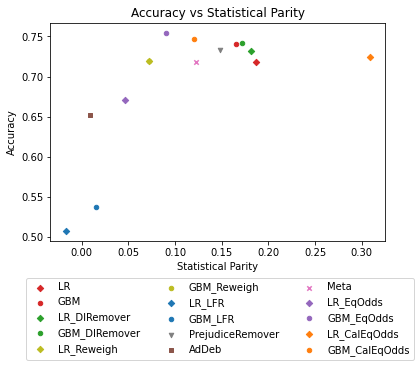

In [13]:
ax= German_lr_baseline.plot(kind='scatter', x= 'SP',  y='ACCURACY', color='tab:red', label='LR', linestyle='-',marker= "D")#', xerr='SP_std',yerr= 'ACCURACY_std'
German_gbm_baseline.plot(kind='scatter', x= 'SP',  y='ACCURACY', color='tab:red', label='GBM', linestyle='-',marker= "o",  ax=ax)

German_lr_dir.plot(kind='scatter', x= 'SP',  y='ACCURACY', color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D", ax=ax)
German_gbm_dir.plot(kind='scatter', x= 'SP',  y='ACCURACY', color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o", ax=ax)

German_lr_rw.plot(kind='scatter', x= 'SP',  y='ACCURACY', color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D", ax=ax)
German_gbm_rw.plot(kind='scatter', x= 'SP',  y='ACCURACY', color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o", ax=ax)

German_lr_lfr.plot(kind='scatter', x= 'SP',  y='ACCURACY', color='tab:blue', label='LR_LFR', linestyle='-',marker= "D", ax=ax)
German_gbm_lfr.plot(kind='scatter', x= 'SP',  y='ACCURACY', color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o", ax=ax)

German_pr_remover.plot(kind='scatter', x= 'SP',  y='ACCURACY', color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v", ax=ax)

German_AdDeb.plot(kind='scatter', x= 'SP',  y='ACCURACY', color='tab:brown', label='AdDeb', linestyle='-',marker= "s", ax=ax)

German_Meta.plot(kind='scatter', x= 'SP',  y='ACCURACY', color='tab:pink', label='Meta', linestyle='-',marker= "x", ax=ax)

German_lr_EO.plot(kind='scatter', x= 'SP',  y='ACCURACY', color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_EO.plot(kind='scatter', x= 'SP',  y='ACCURACY', color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o", ax=ax)

German_lr_CalEO.plot(kind='scatter', x= 'SP',  y='ACCURACY', color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_CalEO.plot(kind='scatter', x= 'SP',  y='ACCURACY', color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o", ax=ax)

plt.xlabel('Statistical Parity')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Statistical Parity')
plt.legend(bbox_to_anchor=(1.1, -0.15),ncol=3)
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/AccSP.png',dpi=300, format='png', bbox_inches='tight')
plt.show()


 # Accuracy Vs Equal Odds

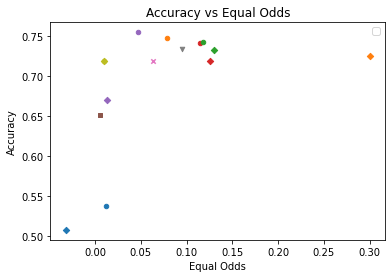

In [14]:
ax= German_lr_baseline.plot(kind='scatter', x= 'EO',  y='ACCURACY', color='tab:red', label='LR', linestyle='-',marker= "D")#', xerr='EO_std',yerr= 'ACCURACY_std'
German_gbm_baseline.plot(kind='scatter', x= 'EO',  y='ACCURACY', color='tab:red', label='GBM', linestyle='-',marker= "o",  ax=ax)

German_lr_dir.plot(kind='scatter', x= 'EO',  y='ACCURACY', color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D", ax=ax)
German_gbm_dir.plot(kind='scatter', x= 'EO',  y='ACCURACY', color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o", ax=ax)

German_lr_rw.plot(kind='scatter', x= 'EO',  y='ACCURACY', color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D", ax=ax)
German_gbm_rw.plot(kind='scatter', x= 'EO',  y='ACCURACY', color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o", ax=ax)

German_lr_lfr.plot(kind='scatter', x= 'EO',  y='ACCURACY', color='tab:blue', label='LR_LFR', linestyle='-',marker= "D", ax=ax)
German_gbm_lfr.plot(kind='scatter', x= 'EO',  y='ACCURACY', color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o", ax=ax)

German_pr_remover.plot(kind='scatter', x= 'EO',  y='ACCURACY', color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v", ax=ax)

German_AdDeb.plot(kind='scatter', x= 'EO',  y='ACCURACY', color='tab:brown', label='AdDeb', linestyle='-',marker= "s", ax=ax)

German_Meta.plot(kind='scatter', x= 'EO',  y='ACCURACY', color='tab:pink', label='Meta', linestyle='-',marker= "x", ax=ax)

German_lr_EO.plot(kind='scatter', x= 'EO',  y='ACCURACY', color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_EO.plot(kind='scatter', x= 'EO',  y='ACCURACY', color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o", ax=ax)

German_lr_CalEO.plot(kind='scatter', x= 'EO',  y='ACCURACY', color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_CalEO.plot(kind='scatter', x= 'EO',  y='ACCURACY', color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o", ax=ax)

plt.xlabel('Equal Odds')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Equal Odds')

plt.legend("")
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/AccEO.png',dpi=300, format='png', bbox_inches='tight')
plt.show()


 # Accuracy Vs Consistency

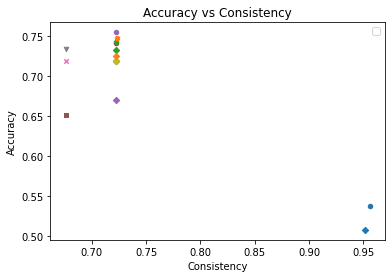

In [15]:
ax= German_lr_baseline.plot(kind='scatter', x= 'CONSISTENCY',  y='ACCURACY', color='tab:red', label='LR', linestyle='-',marker= "D")#', xerr='CONSISTENCY_std',yerr= 'ACCURACY_std'
German_gbm_baseline.plot(kind='scatter', x= 'CONSISTENCY',  y='ACCURACY', color='tab:red', label='GBM', linestyle='-',marker= "o",  ax=ax)

German_lr_dir.plot(kind='scatter', x= 'CONSISTENCY',  y='ACCURACY', color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D", ax=ax)
German_gbm_dir.plot(kind='scatter', x= 'CONSISTENCY',  y='ACCURACY', color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o", ax=ax)

German_lr_rw.plot(kind='scatter', x= 'CONSISTENCY',  y='ACCURACY', color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D", ax=ax)
German_gbm_rw.plot(kind='scatter', x= 'CONSISTENCY',  y='ACCURACY', color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o", ax=ax)

German_lr_lfr.plot(kind='scatter', x= 'CONSISTENCY',  y='ACCURACY', color='tab:blue', label='LR_LFR', linestyle='-',marker= "D", ax=ax)
German_gbm_lfr.plot(kind='scatter', x= 'CONSISTENCY',  y='ACCURACY', color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o", ax=ax)

German_pr_remover.plot(kind='scatter', x= 'CONSISTENCY',  y='ACCURACY', color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v", ax=ax)

German_AdDeb.plot(kind='scatter', x= 'CONSISTENCY',  y='ACCURACY', color='tab:brown', label='AdDeb', linestyle='-',marker= "s", ax=ax)

German_Meta.plot(kind='scatter', x= 'CONSISTENCY',  y='ACCURACY', color='tab:pink', label='Meta', linestyle='-',marker= "x", ax=ax)


German_lr_EO.plot(kind='scatter', x= 'CONSISTENCY',  y='ACCURACY', color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_EO.plot(kind='scatter', x= 'CONSISTENCY',  y='ACCURACY', color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o", ax=ax)

German_lr_CalEO.plot(kind='scatter', x= 'CONSISTENCY',  y='ACCURACY', color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_CalEO.plot(kind='scatter', x= 'CONSISTENCY',  y='ACCURACY', color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o", ax=ax)

plt.xlabel('Consistency')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Consistency')
plt.legend("")
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/AccCONSISTENCY.png',dpi=300, format='png', bbox_inches='tight')
plt.show()


 # Accuracy Vs WGEI

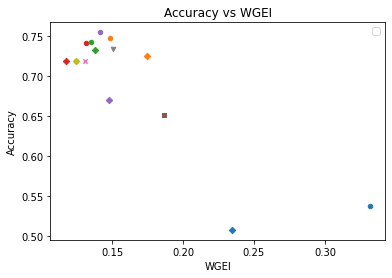

In [16]:
ax= German_lr_baseline.plot(kind='scatter', x= 'WGEI',  y='ACCURACY', color='tab:red', label='LR', linestyle='-',marker= "D")#', xerr='WGEI_std',yerr= 'ACCURACY_std'
German_gbm_baseline.plot(kind='scatter', x= 'WGEI',  y='ACCURACY', color='tab:red', label='GBM', linestyle='-',marker= "o",  ax=ax)

German_lr_dir.plot(kind='scatter', x= 'WGEI',  y='ACCURACY', color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D", ax=ax)
German_gbm_dir.plot(kind='scatter', x= 'WGEI',  y='ACCURACY', color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o", ax=ax)

German_lr_rw.plot(kind='scatter', x= 'WGEI',  y='ACCURACY', color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D", ax=ax)
German_gbm_rw.plot(kind='scatter', x= 'WGEI',  y='ACCURACY', color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o", ax=ax)

German_lr_lfr.plot(kind='scatter', x= 'WGEI',  y='ACCURACY', color='tab:blue', label='LR_LFR', linestyle='-',marker= "D", ax=ax)
German_gbm_lfr.plot(kind='scatter', x= 'WGEI',  y='ACCURACY', color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o", ax=ax)

German_pr_remover.plot(kind='scatter', x= 'WGEI',  y='ACCURACY', color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v", ax=ax)

German_AdDeb.plot(kind='scatter', x= 'WGEI',  y='ACCURACY', color='tab:brown', label='AdDeb', linestyle='-',marker= "s", ax=ax)

German_Meta.plot(kind='scatter', x= 'WGEI',  y='ACCURACY', color='tab:pink', label='Meta', linestyle='-',marker= "x", ax=ax)


German_lr_EO.plot(kind='scatter', x= 'WGEI',  y='ACCURACY', color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_EO.plot(kind='scatter', x= 'WGEI',  y='ACCURACY', color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o", ax=ax)

German_lr_CalEO.plot(kind='scatter', x= 'WGEI',  y='ACCURACY', color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_CalEO.plot(kind='scatter', x= 'WGEI',  y='ACCURACY', color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o", ax=ax)

plt.xlabel('WGEI')
plt.ylabel('Accuracy')
plt.title('Accuracy vs WGEI')

plt.legend("")
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/AccWGEI.png',dpi=300, format='png', bbox_inches='tight')
plt.show()


# Accuracy vs BGEI

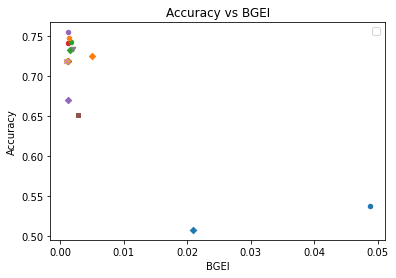

In [17]:
ax= German_lr_baseline.plot(kind='scatter', x= 'BGEI',  y='ACCURACY', color='tab:red', label='LR', linestyle='-',marker= "D")#', xerr='BGEI_std',yerr= 'ACCURACY_std'
German_gbm_baseline.plot(kind='scatter', x= 'BGEI',  y='ACCURACY', color='tab:red', label='GBM', linestyle='-',marker= "o",  ax=ax)

German_lr_dir.plot(kind='scatter', x= 'BGEI',  y='ACCURACY', color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D", ax=ax)
German_gbm_dir.plot(kind='scatter', x= 'BGEI',  y='ACCURACY', color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o", ax=ax)

German_lr_rw.plot(kind='scatter', x= 'BGEI',  y='ACCURACY', color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D", ax=ax)
German_gbm_rw.plot(kind='scatter', x= 'BGEI',  y='ACCURACY', color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o", ax=ax)
German_lr_lfr.plot(kind='scatter', x= 'BGEI',  y='ACCURACY', color='tab:blue', label='LR_LFR', linestyle='-',marker= "D", ax=ax)
German_gbm_lfr.plot(kind='scatter', x= 'BGEI',  y='ACCURACY', color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o", ax=ax)

German_pr_remover.plot(kind='scatter', x= 'BGEI',  y='ACCURACY', color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v", ax=ax)

German_AdDeb.plot(kind='scatter', x= 'BGEI',  y='ACCURACY', color='tab:brown', label='AdDeb', linestyle='-',marker= "s", ax=ax)

German_Meta.plot(kind='scatter', x= 'BGEI',  y='ACCURACY', color='tab:pink', label='Meta', linestyle='-',marker= "x", ax=ax)


German_lr_EO.plot(kind='scatter', x= 'BGEI',  y='ACCURACY', color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_EO.plot(kind='scatter', x= 'BGEI',  y='ACCURACY', color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o", ax=ax)

German_lr_CalEO.plot(kind='scatter', x= 'BGEI',  y='ACCURACY', color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_CalEO.plot(kind='scatter', x= 'BGEI',  y='ACCURACY', color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o", ax=ax)

plt.xlabel('BGEI')
plt.ylabel('Accuracy')
plt.title('Accuracy vs BGEI')

plt.legend("")
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/AccBGEI.png',dpi=300, format='png', bbox_inches='tight')
plt.show()


# CONSISTENCY BETWEEN GROUPAND INDIVIDUAL FAIRNESS

# Consistency and SP

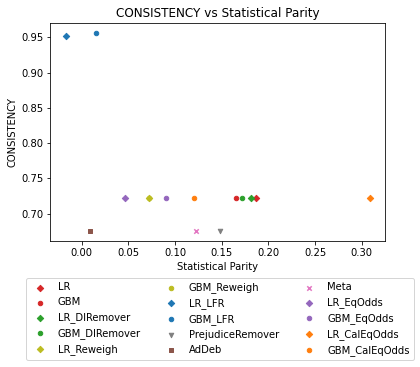

In [18]:
ax= German_lr_baseline.plot(kind='scatter', x= 'SP',  y='CONSISTENCY', color='tab:red', label='LR', linestyle='-',marker= "D")#', xerr='SP_std',yerr= 'CONSISTENCY_std'
German_gbm_baseline.plot(kind='scatter', x= 'SP',  y='CONSISTENCY', color='tab:red', label='GBM', linestyle='-',marker= "o",  ax=ax)

German_lr_dir.plot(kind='scatter', x= 'SP',  y='CONSISTENCY', color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D", ax=ax)
German_gbm_dir.plot(kind='scatter', x= 'SP',  y='CONSISTENCY', color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o", ax=ax)

German_lr_rw.plot(kind='scatter', x= 'SP',  y='CONSISTENCY', color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D", ax=ax)
German_gbm_rw.plot(kind='scatter', x= 'SP',  y='CONSISTENCY', color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o", ax=ax)

German_lr_lfr.plot(kind='scatter', x= 'SP',  y='CONSISTENCY', color='tab:blue', label='LR_LFR', linestyle='-',marker= "D", ax=ax)
German_gbm_lfr.plot(kind='scatter', x= 'SP',  y='CONSISTENCY', color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o", ax=ax)

German_pr_remover.plot(kind='scatter', x= 'SP',  y='CONSISTENCY', color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v", ax=ax)

German_AdDeb.plot(kind='scatter', x= 'SP',  y='CONSISTENCY', color='tab:brown', label='AdDeb', linestyle='-',marker= "s", ax=ax)

German_Meta.plot(kind='scatter', x= 'SP',  y='CONSISTENCY', color='tab:pink', label='Meta', linestyle='-',marker= "x", ax=ax)


German_lr_EO.plot(kind='scatter', x= 'SP',  y='CONSISTENCY', color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_EO.plot(kind='scatter', x= 'SP',  y='CONSISTENCY', color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o", ax=ax)

German_lr_CalEO.plot(kind='scatter', x= 'SP',  y='CONSISTENCY', color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_CalEO.plot(kind='scatter', x= 'SP',  y='CONSISTENCY', color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o", ax=ax)

plt.xlabel('Statistical Parity')
plt.ylabel('CONSISTENCY')
plt.title('CONSISTENCY vs Statistical Parity')
plt.legend(bbox_to_anchor=(1.1, -0.15),ncol=3)
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/ConsSP.png',dpi=300, format='png', bbox_inches='tight')
plt.show()


# Consistency vs Equal Odds

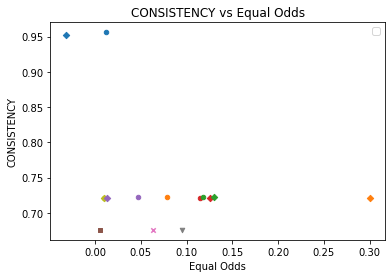

In [19]:
ax= German_lr_baseline.plot(kind='scatter', x= 'EO',  y='CONSISTENCY', color='tab:red', label='LR', linestyle='-',marker= "D")#', xerr='EO_std',yerr= 'CONSISTENCY_std'
German_gbm_baseline.plot(kind='scatter', x= 'EO',  y='CONSISTENCY', color='tab:red', label='GBM', linestyle='-',marker= "o",  ax=ax)

German_lr_dir.plot(kind='scatter', x= 'EO',  y='CONSISTENCY', color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D", ax=ax)
German_gbm_dir.plot(kind='scatter', x= 'EO',  y='CONSISTENCY', color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o", ax=ax)

German_lr_rw.plot(kind='scatter', x= 'EO',  y='CONSISTENCY', color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D", ax=ax)
German_gbm_rw.plot(kind='scatter', x= 'EO',  y='CONSISTENCY', color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o", ax=ax)

German_lr_lfr.plot(kind='scatter', x= 'EO',  y='CONSISTENCY', color='tab:blue', label='LR_LFR', linestyle='-',marker= "D", ax=ax)
German_gbm_lfr.plot(kind='scatter', x= 'EO',  y='CONSISTENCY', color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o", ax=ax)

German_pr_remover.plot(kind='scatter', x= 'EO',  y='CONSISTENCY', color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v", ax=ax)

German_AdDeb.plot(kind='scatter', x= 'EO',  y='CONSISTENCY', color='tab:brown', label='AdDeb', linestyle='-',marker= "s", ax=ax)

German_Meta.plot(kind='scatter', x= 'EO',  y='CONSISTENCY', color='tab:pink', label='Meta', linestyle='-',marker= "x", ax=ax)


German_lr_EO.plot(kind='scatter', x= 'EO',  y='CONSISTENCY', color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_EO.plot(kind='scatter', x= 'EO',  y='CONSISTENCY', color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o", ax=ax)

German_lr_CalEO.plot(kind='scatter', x= 'EO',  y='CONSISTENCY', color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_CalEO.plot(kind='scatter', x= 'EO',  y='CONSISTENCY', color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o", ax=ax)

plt.xlabel('Equal Odds')
plt.ylabel('CONSISTENCY')
plt.title('CONSISTENCY vs Equal Odds')
plt.legend("")
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/ConsEO.png',dpi=300, format='png', bbox_inches='tight')
plt.show()


# Consistency Vs BGEI


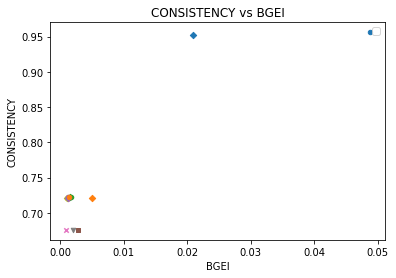

In [20]:
ax= German_lr_baseline.plot(kind='scatter', x= 'BGEI',  y='CONSISTENCY', color='tab:red', label='LR', linestyle='-',marker= "D")#', xerr='BGEI_std',yerr= 'CONSISTENCY_std'
German_gbm_baseline.plot(kind='scatter', x= 'BGEI',  y='CONSISTENCY', color='tab:red', label='GBM', linestyle='-',marker= "o",  ax=ax)

German_lr_dir.plot(kind='scatter', x= 'BGEI',  y='CONSISTENCY', color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D", ax=ax)
German_gbm_dir.plot(kind='scatter', x= 'BGEI',  y='CONSISTENCY', color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o", ax=ax)

German_lr_rw.plot(kind='scatter', x= 'BGEI',  y='CONSISTENCY', color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D", ax=ax)
German_gbm_rw.plot(kind='scatter', x= 'BGEI',  y='CONSISTENCY', color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o", ax=ax)

German_lr_lfr.plot(kind='scatter', x= 'BGEI',  y='CONSISTENCY', color='tab:blue', label='LR_LFR', linestyle='-',marker= "D", ax=ax)
German_gbm_lfr.plot(kind='scatter', x= 'BGEI',  y='CONSISTENCY', color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o", ax=ax)

German_pr_remover.plot(kind='scatter', x= 'BGEI',  y='CONSISTENCY', color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v", ax=ax)

German_AdDeb.plot(kind='scatter', x= 'BGEI',  y='CONSISTENCY', color='tab:brown', label='AdDeb', linestyle='-',marker= "s", ax=ax)

German_Meta.plot(kind='scatter', x= 'BGEI',  y='CONSISTENCY', color='tab:pink', label='Meta', linestyle='-',marker= "x", ax=ax)


German_lr_EO.plot(kind='scatter', x= 'BGEI',  y='CONSISTENCY', color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_EO.plot(kind='scatter', x= 'BGEI',  y='CONSISTENCY', color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o", ax=ax)

German_lr_CalEO.plot(kind='scatter', x= 'BGEI',  y='CONSISTENCY', color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_CalEO.plot(kind='scatter', x= 'BGEI',  y='CONSISTENCY', color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o", ax=ax)

plt.xlabel('BGEI')
plt.ylabel('CONSISTENCY')
plt.title('CONSISTENCY vs BGEI')
plt.legend("")
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/ConsBGEI.png',dpi=300, format='png', bbox_inches='tight')
plt.show()


# WGEI vs Equal Odds

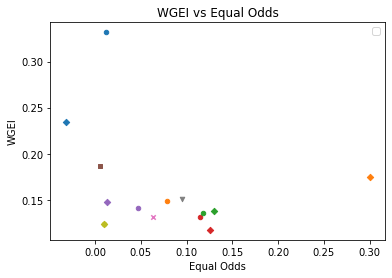

In [21]:
ax= German_lr_baseline.plot(kind='scatter', x= 'EO',  y='WGEI', color='tab:red', label='LR', linestyle='-',marker= "D")#', xerr='EO_std',yerr= 'WGEI_std'
German_gbm_baseline.plot(kind='scatter', x= 'EO',  y='WGEI', color='tab:red', label='GBM', linestyle='-',marker= "o",  ax=ax)

German_lr_dir.plot(kind='scatter', x= 'EO',  y='WGEI', color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D", ax=ax)
German_gbm_dir.plot(kind='scatter', x= 'EO',  y='WGEI', color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o", ax=ax)

German_lr_rw.plot(kind='scatter', x= 'EO',  y='WGEI', color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D", ax=ax)
German_gbm_rw.plot(kind='scatter', x= 'EO',  y='WGEI', color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o", ax=ax)

German_lr_lfr.plot(kind='scatter', x= 'EO',  y='WGEI', color='tab:blue', label='LR_LFR', linestyle='-',marker= "D", ax=ax)
German_gbm_lfr.plot(kind='scatter', x= 'EO',  y='WGEI', color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o", ax=ax)

German_pr_remover.plot(kind='scatter', x= 'EO',  y='WGEI', color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v", ax=ax)

German_AdDeb.plot(kind='scatter', x= 'EO',  y='WGEI', color='tab:brown', label='AdDeb', linestyle='-',marker= "s", ax=ax)

German_Meta.plot(kind='scatter', x= 'EO',  y='WGEI', color='tab:pink', label='Meta', linestyle='-',marker= "x", ax=ax)


German_lr_EO.plot(kind='scatter', x= 'EO',  y='WGEI', color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_EO.plot(kind='scatter', x= 'EO',  y='WGEI', color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o", ax=ax)

German_lr_CalEO.plot(kind='scatter', x= 'EO',  y='WGEI', color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_CalEO.plot(kind='scatter', x= 'EO',  y='WGEI', color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o", ax=ax)

plt.xlabel('Equal Odds')
plt.ylabel('WGEI')
plt.title('WGEI vs Equal Odds')
plt.legend("")
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/WGEIEO.png',dpi=300, format='png', bbox_inches='tight')
plt.show()


# WGEI Vs BGEI


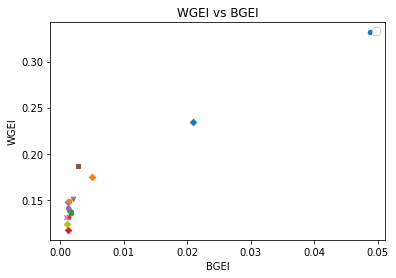

In [22]:
ax= German_lr_baseline.plot(kind='scatter', x= 'BGEI',  y='WGEI', color='tab:red', label='LR', linestyle='-',marker= "D")#', xerr='BGEI_std',yerr= 'WGEI_std'
German_gbm_baseline.plot(kind='scatter', x= 'BGEI',  y='WGEI', color='tab:red', label='GBM', linestyle='-',marker= "o",  ax=ax)

German_lr_dir.plot(kind='scatter', x= 'BGEI',  y='WGEI', color='tab:green', label='LR_DIRemover', linestyle='-',marker= "D", ax=ax)
German_gbm_dir.plot(kind='scatter', x= 'BGEI',  y='WGEI', color='tab:green', label='GBM_DIRemover', linestyle='-',marker= "o", ax=ax)

German_lr_rw.plot(kind='scatter', x= 'BGEI',  y='WGEI', color='tab:olive', label='LR_Reweigh', linestyle='-',marker= "D", ax=ax)
German_gbm_rw.plot(kind='scatter', x= 'BGEI',  y='WGEI', color='tab:olive', label='GBM_Reweigh', linestyle='-',marker= "o", ax=ax)

German_lr_lfr.plot(kind='scatter', x= 'BGEI',  y='WGEI', color='tab:blue', label='LR_LFR', linestyle='-',marker= "D", ax=ax)
German_gbm_lfr.plot(kind='scatter', x= 'BGEI',  y='WGEI', color='tab:blue', label='GBM_LFR', linestyle='-',marker= "o", ax=ax)

German_pr_remover.plot(kind='scatter', x= 'BGEI',  y='WGEI', color='tab:gray', label='PrejudiceRemover', linestyle='-',marker= "v", ax=ax)

German_AdDeb.plot(kind='scatter', x= 'BGEI',  y='WGEI', color='tab:brown', label='AdDeb', linestyle='-',marker= "s", ax=ax)

German_Meta.plot(kind='scatter', x= 'BGEI',  y='WGEI', color='tab:pink', label='Meta', linestyle='-',marker= "x", ax=ax)


German_lr_EO.plot(kind='scatter', x= 'BGEI',  y='WGEI', color='tab:purple', label='LR_EqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_EO.plot(kind='scatter', x= 'BGEI',  y='WGEI', color='tab:purple', label='GBM_EqOdds', linestyle='-',marker= "o", ax=ax)

German_lr_CalEO.plot(kind='scatter', x= 'BGEI',  y='WGEI', color='tab:orange', label='LR_CalEqOdds', linestyle='-',marker= "D", ax=ax)
German_gbm_CalEO.plot(kind='scatter', x= 'BGEI',  y='WGEI', color='tab:orange', label='GBM_CalEqOdds', linestyle='-',marker= "o", ax=ax)

plt.xlabel('BGEI')
plt.ylabel('WGEI')
plt.title('WGEI vs BGEI')
plt.legend("")
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/WGEIBGEI.png',dpi=300, format='png', bbox_inches='tight')
plt.show()


#REPAIR LEVEL EFFECTS

GBM

In [23]:
#German 
#disparate impact values at varying repair levels for gbm
gbm0=pd.read_excel(dir_gbm_0, sheet_name="German").iloc[51:52]
gbm3=pd.read_excel(dir_gbm_3, sheet_name="German").iloc[51:52]
gbm5=pd.read_excel(dir_gbm_5, sheet_name="German").iloc[51:52] #old not working had recreate new tab (German_use)
gbm7=pd.read_excel(dir_gbm_7, sheet_name="German").iloc[51:52]
gbm1= pd.read_excel(dir_gbm, sheet_name='German').iloc[51:52]

#all together
gbms= pd.concat([gbm0,gbm3, gbm5, gbm7, gbm1])
gbms['Repair Level']=[0,0.3,0.5,0.7,1]





LR

In [24]:
#disparate impact values at varying repair levels for lr
lr0=pd.read_excel(dir_lr_0, sheet_name="German").iloc[51:52]
lr3=pd.read_excel(dir_lr_3, sheet_name="German").iloc[51:52]
lr5=pd.read_excel(dir_lr_5, sheet_name="German").iloc[51:52] #old not working had recreate new tab (German_use)
lr7=pd.read_excel(dir_lr_7, sheet_name="German").iloc[51:52]
lr1= pd.read_excel(dir_lr, sheet_name='German').iloc[51:52]

#all together
lrs= pd.concat([lr0, lr3, lr5, lr7, lr1])
lrs['Repair Level']=[0,0.3,0.5,0.7,1]


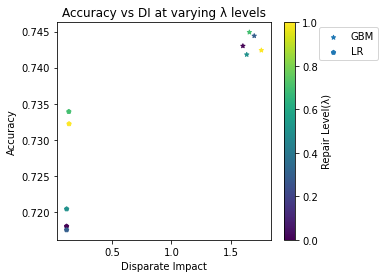

In [25]:
ax =gbms.plot(kind='scatter', x='DI', y='ACCURACY',  label='GBM', marker='*', c='Repair Level', colormap='viridis', sharex= False)
lrs.plot(kind='scatter', x='WGEI', y='ACCURACY',  label='LR',  marker='p', ax=ax,c='Repair Level',colormap='viridis')
f = plt.gcf()
 
f.delaxes(f.axes[1])
cb=f.get_axes()[1]
cb.set_ylabel('Repair Level(\u03BB)')
plt.ylabel('Accuracy')
plt.xlabel('Disparate Impact', visible= True) 
plt.legend( loc='best', bbox_to_anchor=(1.2, 1))
plt.title('Accuracy vs DI at varying \u03BB levels')
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/AccDIRRepLvl.png',dpi=300, format='png', bbox_inches='tight')

plt.show()

disparate impact and repair level

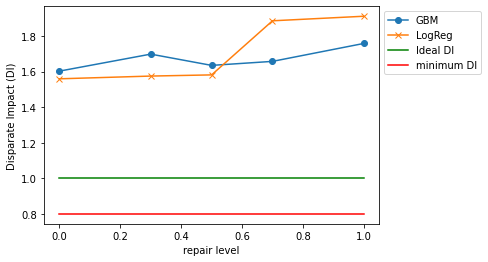

In [26]:
plt.plot(gbms['Repair Level'], gbms['DI'], marker='o',label='GBM')
plt.plot(lrs['Repair Level'], lrs['DI'], marker='x',label='LogReg')
plt.plot([0, 1], [1, 1], 'g', label= 'Ideal DI')
plt.plot([0, 1], [0.8, 0.8], 'r', label='minimum DI')
# plt.ylim([0.4, 1.2])
plt.ylabel('Disparate Impact (DI)')
plt.xlabel('repair level')
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/dirRepLevel.png',dpi=300, format='png', bbox_inches='tight')
plt.show()

Accuracy and repair levels

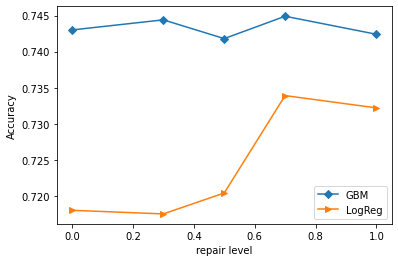

In [27]:
plt.plot(gbms['Repair Level'], gbms['ACCURACY'], marker='D',label='GBM')
plt.plot(lrs['Repair Level'], lrs['ACCURACY'], marker='>',label='LogReg')
# plt.plot([0, 1], [1, 1], 'g')
# plt.plot([0, 1], [0.8, 0.8], 'r')
# plt.ylim([0.4, 1.2])
plt.ylabel('Accuracy')
plt.xlabel('repair level')
plt.legend()
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/AccRepLevel.png',dpi=300, format='png', bbox_inches='tight')
plt.show()

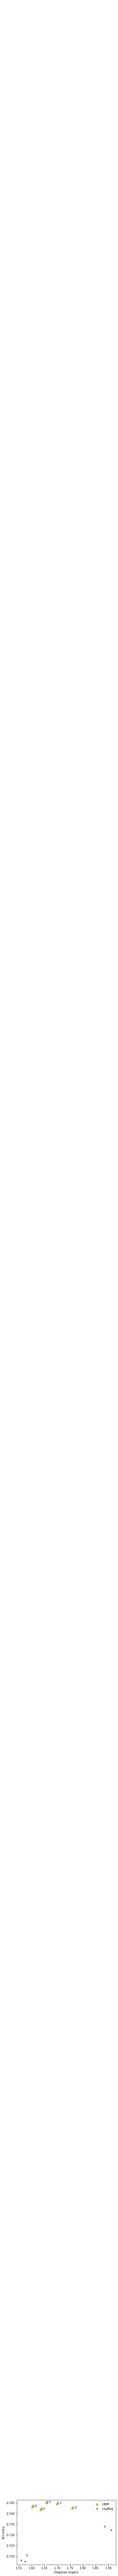

In [28]:
# Disparate impact vs Accuracy vs Repair Levels
#may be too complicate for intepretation
fig, ax = plt.subplots()
ax.scatter(gbms['DI'],gbms['ACCURACY'], marker= 'D', color= 'tab:olive',label='GBM')
ax.scatter(lrs['DI'],lrs['ACCURACY'], marker= 'v', color= 'tab:gray',label='LogReg')
for i, txt in enumerate(gbms['Repair Level'].to_numpy()):
    ax.annotate(txt, (gbms.DI.iloc[i], gbms.ACCURACY.iloc[i]))
for i, txt in enumerate(lrs['Repair Level'].to_numpy()):
    ax.annotate(txt, (lrs.DI.iloc[i], lrs.DI.iloc[i]))

plt.legend(bbox_to_anchor=(1, 1))
ax.set_ylabel('Accuracy')
ax.set_xlabel('Disparae Impact')
# plt.axvline(x=0.8,linewidth=1.2, linestyle='dashed', color= 'red', label='Base Fairness')
# plt.axvline(x=1,linewidth=1.2, linestyle='dashed', color= 'green', label='Ideal Fairness')
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/Dir_Acc_RepLevel.png',dpi=300, format='png', bbox_inches='tight')
plt.show()


# Prejudice Remover Eta Levels

In [29]:

#disparate impact values at varying repair levels for gbm
PR1=pd.read_excel(PRemover1, sheet_name="German").iloc[51:52]
PR25=pd.read_excel(PRemover25, sheet_name="German").iloc[51:52]
PR50=pd.read_excel(PRemover50, sheet_name="German").iloc[51:52] #old not working had recreate new tab (German_use)
PR75=pd.read_excel(PRemover75, sheet_name="German").iloc[51:52]
PR100= pd.read_excel(PRemover, sheet_name='German').iloc[51:52]

#all together
prs= pd.concat([PR1,PR25,PR50,PR75,PR100])
prs['Etas']=[1,25,50,75,100]


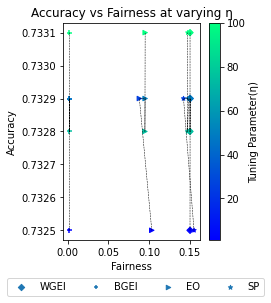

In [30]:
#Parameter Varying Plots for PR Remover
ax = prs.plot(kind='scatter', x='WGEI', y='ACCURACY',  label='WGEI', marker='D', c='Etas', colormap='winter', sharex= False)
prs.plot(kind='scatter', x='BGEI', y='ACCURACY',  label='BGEI',  marker='+', ax=ax,c='Etas',colormap='winter')
prs.plot(kind='scatter', x='EO', y='ACCURACY',  label='EO',  marker='>', ax=ax,c='Etas',colormap='winter')
prs.plot(kind='scatter', x='SP', y='ACCURACY',  label='SP',  marker='*', ax=ax,c='Etas',colormap='winter')
# prs.plot(kind='scatter', x='SP', y='ACCURACY',  label='prs_SP',  marker='>', ax=ax,c='Etas',colormap='viridis')
# prs.plot(kind='scatter', x='EOP', y='ACCURACY',  label='prs_EOP',  marker='v', ax=ax,c='Etas',colormap='viridis')
plt.plot(prs['WGEI'],prs['ACCURACY'], color='black', linewidth=0.5, linestyle='dashed', label='_nolegend_')
plt.plot(prs['BGEI'],prs['ACCURACY'], color='black', linewidth=0.5, linestyle='dashed', label='_nolegend_')
plt.plot(prs['EO'],prs['ACCURACY'], color='black',linewidth=0.5, linestyle='dashed', label='_nolegend_')
plt.plot(prs['SP'],prs['ACCURACY'], color='black', linewidth=0.5, linestyle='dashed', label='_nolegend_')

f = plt.gcf()
f.delaxes(f.axes[2]) 
f.delaxes(f.axes[1]) 
f.delaxes(f.axes[1])
cb=f.get_axes()[1]
cb.set_ylabel('Tuning Parameter(\u03B7)')
plt.ylabel('Accuracy')
plt.xlabel('Fairness') 
plt.legend( loc='best', bbox_to_anchor=(1.5, -0.15), ncol=4)
plt.title('Accuracy vs Fairness at varying \u03B7')
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/PR_remover.png',dpi=300, format='png', bbox_inches='tight')
plt.show()



# META CLASSIFIER AT TAU LEVELS

In [31]:
#disparate impact values at varying repair levels for gbm
meta_0=pd.read_excel(Meta0, sheet_name="German").iloc[51:52]
meta_2=pd.read_excel(Meta2, sheet_name="German").iloc[51:52]
meta_4=pd.read_excel(Meta4, sheet_name="German").iloc[51:52] #old not working had recreate new tab (German_use)
meta_6=pd.read_excel(Meta6, sheet_name="German").iloc[51:52]
meta_8= pd.read_excel(Meta8, sheet_name='German').iloc[51:52]
meta_1=pd.read_excel(Meta1, sheet_name='German').iloc[51:52]

#all together
metas= pd.concat([meta_0, meta_2, meta_4, meta_6, meta_8, meta_1])
metas['Tau']=[0,0.2,0.4,0.6,0.8,1.0]

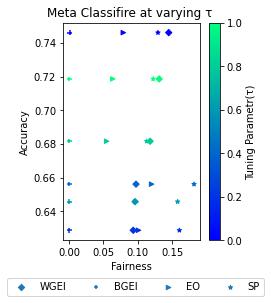

In [32]:
#Parameter Varying Plots for PR Remover
ax = metas.plot(kind='scatter', x='WGEI', y='ACCURACY',  label='WGEI', marker='D', c='Tau', colormap='winter', sharex= False)
metas.plot(kind='scatter', x='BGEI', y='ACCURACY',  label='BGEI',  marker='+', ax=ax,c='Tau',colormap='winter')
metas.plot(kind='scatter', x='EO', y='ACCURACY',  label='EO',  marker='>', ax=ax,c='Tau',colormap='winter')
metas.plot(kind='scatter', x='SP', y='ACCURACY',  label='SP',  marker='*', ax=ax,c='Tau',colormap='winter')
# metas.plot(kind='scatter', x='SP', y='ACCURACY',  label='metas_SP',  marker='>', ax=ax,c='Etas',colormap='viridis')
# metas.plot(kind='scatter', x='EOP', y='ACCURACY',  label='metas_EOP',  marker='v', ax=ax,c='Etas',colormap='viridis')
# plt.plot(metas['WGEI'],metas['ACCURACY'], color='black', linewidth=0.5, linestyle='dashed', label='_nolegend_')
# plt.plot(metas['BGEI'],metas['ACCURACY'], color='black', linewidth=0.5, linestyle='dashed', label='_nolegend_')
# plt.plot(metas['EO'],metas['ACCURACY'], color='black',linewidth=0.5, linestyle='dashed', label='_nolegend_')
# plt.plot(metas['SP'],metas['ACCURACY'], color='black', linewidth=0.5, linestyle='dashed', label='_nolegend_')

f = plt.gcf()
f.delaxes(f.axes[2]) 
f.delaxes(f.axes[1]) 
f.delaxes(f.axes[1])
cb=f.get_axes()[1]
cb.set_ylabel('Tuning Parametr(\u03C4)')
plt.ylabel('Accuracy')
plt.xlabel('Fairness') 
plt.legend( loc='best', bbox_to_anchor=(1.5, -0.15), ncol=4)
plt.title('Meta Classifire at varying \u03C4 ')
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/Meta.png',dpi=300, format='png', bbox_inches='tight')
plt.show()

# Computing Performance Metrics 

## dataframes

Baselines

In [33]:
#Baselines
#Logistic Regression Baseline
LR=pd.read_excel(baseline_lr, sheet_name="German")[51:52]
LR_std= pd.read_excel(baseline_lr, sheet_name="German")[52:53].add_suffix('_std')

#GBM Baseline
GBM=pd.read_excel(baseline_gbm, sheet_name="German")[51:52]
GBM_std= pd.read_excel(baseline_gbm, sheet_name="German")[52:53].add_suffix('_std')

Disparate impact remover

In [34]:
#DIR+ Logistic Regression
LR_dir=pd.read_excel(dir_lr, sheet_name="German")[51:52]
LR_dir_std= pd.read_excel(dir_lr, sheet_name="German")[52:53].add_suffix('_std')

#DIR+ GBM
GBM_dir=pd.read_excel(dir_gbm, sheet_name="German")[51:52]
GBM_dir_std= pd.read_excel(dir_gbm, sheet_name="German")[52:53].add_suffix('_std')



Reweighing

In [35]:
#RW+ Logistic Regression
LR_rw=pd.read_excel(rw_lr, sheet_name="German")[51:52]
LR_rw_std= pd.read_excel(rw_lr, sheet_name="German")[52:53].add_suffix('_std')

#RW+ GBM
GBM_rw=pd.read_excel(rw_gbm, sheet_name="German")[51:52]
GBM_rw_std= pd.read_excel(rw_gbm, sheet_name="German")[52:53].add_suffix('_std')

LFR

In [36]:
#LFR+ Logistic Regression
LR_lfr=pd.read_excel(lfr_lr, sheet_name="German")[51:52]
LR_lfr_std= pd.read_excel(lfr_lr, sheet_name="German")[52:53].add_suffix('_std')

#LFR+ GBM
GBM_lfr=pd.read_excel(lfr_gbm, sheet_name="German")[51:52]
GBM_lfr_std= pd.read_excel(lfr_gbm, sheet_name="German")[52:53].add_suffix('_std')

Prejudice Remover

In [37]:
#Prejudice Remover
PR=pd.read_excel(PRemover, sheet_name="German")[51:52]
PR_std= pd.read_excel(PRemover, sheet_name="German")[52:53].add_suffix('_std')


AdeDeb

In [38]:
# AdDeb
adDeb=pd.read_excel(AdDeb, sheet_name="German")[51:52]
adDeb_std= pd.read_excel(AdDeb, sheet_name="German")[52:53].add_suffix('_std')

Meta Classifier

In [39]:
meta=pd.read_excel(Meta1, sheet_name="German")[51:52]
meta_std= pd.read_excel(Meta1, sheet_name="German")[52:53].add_suffix('_std')

Equal Odds

In [40]:
#EO+ Logistic Regression
LR_EO=pd.read_excel(EO_lr, sheet_name="German")[51:52]
LR_EO_std= pd.read_excel(EO_lr, sheet_name="German")[52:53].add_suffix('_std')

#EO+ GBM
GBM_EO=pd.read_excel(EO_gbm, sheet_name="German")[51:52]
GBM_EO_std= pd.read_excel(EO_gbm, sheet_name="German")[52:53].add_suffix('_std')

Calibrated Equal Odds

In [41]:
#CalEO+ Logistic Regression
LR_CalEO=pd.read_excel(CalEO_lr, sheet_name="German")[51:52]
LR_CalEO_std= pd.read_excel(CalEO_lr, sheet_name="German")[52:53].add_suffix('_std')

#CalEO+ GBM
GBM_CalEO=pd.read_excel(CalEO_gbm, sheet_name="German")[51:52]
GBM_CalEO_std= pd.read_excel(CalEO_gbm, sheet_name="German")[52:53].add_suffix('_std')

 ## Accuracies, Precision, NPV

Comparing the performance metrics of the various baseline and bias mitigation algorithms

In [42]:
Accuracy= list([LR['ACCURACY'].to_numpy()[0], GBM['ACCURACY'].to_numpy()[0], LR_dir['ACCURACY'].to_numpy()[0],
                GBM_dir['ACCURACY'].to_numpy()[0],LR_rw['ACCURACY'].to_numpy()[0], GBM_rw['ACCURACY'].to_numpy()[0],
                LR_lfr['ACCURACY'].to_numpy()[0], GBM_lfr['ACCURACY'].to_numpy()[0], PR['ACCURACY'].to_numpy()[0],
                adDeb['ACCURACY'].to_numpy()[0],meta['ACCURACY'].to_numpy()[0],
                LR_EO['ACCURACY'].to_numpy()[0],GBM_EO['ACCURACY'].to_numpy()[0],LR_CalEO['ACCURACY'].to_numpy()[0],
                GBM_CalEO['ACCURACY'].to_numpy()[0]])

Accuracy_std= list([LR_std['ACCURACY_std'].to_numpy()[0], GBM_std['ACCURACY_std'].to_numpy()[0], LR_dir_std['ACCURACY_std'].to_numpy()[0],
                GBM_dir_std['ACCURACY_std'].to_numpy()[0],LR_rw_std['ACCURACY_std'].to_numpy()[0], GBM_rw_std['ACCURACY_std'].to_numpy()[0],
                LR_lfr_std['ACCURACY_std'].to_numpy()[0], GBM_lfr_std['ACCURACY_std'].to_numpy()[0], PR_std['ACCURACY_std'].to_numpy()[0],
                adDeb_std['ACCURACY_std'].to_numpy()[0],meta_std['ACCURACY_std'].to_numpy()[0],
                LR_EO_std['ACCURACY_std'].to_numpy()[0],GBM_EO_std['ACCURACY_std'].to_numpy()[0],LR_CalEO_std['ACCURACY_std'].to_numpy()[0],
                GBM_CalEO_std['ACCURACY_std'].to_numpy()[0]])


In [44]:
PPV= list([LR['PPV'].to_numpy()[0], GBM['PPV'].to_numpy()[0], LR_dir['PPV'].to_numpy()[0],
                GBM_dir['PPV'].to_numpy()[0],LR_rw['PPV'].to_numpy()[0], GBM_rw['PPV'].to_numpy()[0],
                LR_lfr['PPV'].to_numpy()[0], GBM_lfr['PPV'].to_numpy()[0], PR['PPV'].to_numpy()[0],
                adDeb['PPV'].to_numpy()[0],meta['PPV'].to_numpy()[0],
                LR_EO['PPV'].to_numpy()[0],GBM_EO['PPV'].to_numpy()[0],LR_CalEO['PPV'].to_numpy()[0],
                GBM_CalEO['PPV'].to_numpy()[0]])

PPV_std= list([LR_std['PPV_std'].to_numpy()[0], GBM_std['PPV_std'].to_numpy()[0], LR_dir_std['PPV_std'].to_numpy()[0],
                GBM_dir_std['PPV_std'].to_numpy()[0],LR_rw_std['PPV_std'].to_numpy()[0], GBM_rw_std['PPV_std'].to_numpy()[0],
                LR_lfr_std['PPV_std'].to_numpy()[0], GBM_lfr_std['PPV_std'].to_numpy()[0], PR_std['PPV_std'].to_numpy()[0],
                adDeb_std['PPV_std'].to_numpy()[0],meta_std['PPV_std'].to_numpy()[0],
                LR_EO_std['PPV_std'].to_numpy()[0],GBM_EO_std['PPV_std'].to_numpy()[0],LR_CalEO_std['PPV_std'].to_numpy()[0],
                GBM_CalEO_std['PPV_std'].to_numpy()[0]])


In [45]:
NPV= list([LR['NPV'].to_numpy()[0], GBM['NPV'].to_numpy()[0], LR_dir['NPV'].to_numpy()[0],
                GBM_dir['NPV'].to_numpy()[0],LR_rw['NPV'].to_numpy()[0], GBM_rw['NPV'].to_numpy()[0],
                LR_lfr['NPV'].to_numpy()[0], GBM_lfr['NPV'].to_numpy()[0], PR['NPV'].to_numpy()[0],
                adDeb['NPV'].to_numpy()[0],meta['NPV'].to_numpy()[0],
                LR_EO['NPV'].to_numpy()[0],GBM_EO['NPV'].to_numpy()[0],LR_CalEO['NPV'].to_numpy()[0],
                GBM_CalEO['NPV'].to_numpy()[0]])

NPV_std= list([LR_std['NPV_std'].to_numpy()[0], GBM_std['NPV_std'].to_numpy()[0], LR_dir_std['NPV_std'].to_numpy()[0],
                GBM_dir_std['NPV_std'].to_numpy()[0],LR_rw_std['NPV_std'].to_numpy()[0], GBM_rw_std['NPV_std'].to_numpy()[0],
                LR_lfr_std['NPV_std'].to_numpy()[0], GBM_lfr_std['NPV_std'].to_numpy()[0], PR_std['NPV_std'].to_numpy()[0],
                adDeb_std['NPV_std'].to_numpy()[0],meta_std['NPV_std'].to_numpy()[0],
                LR_EO_std['NPV_std'].to_numpy()[0],GBM_EO_std['NPV_std'].to_numpy()[0],LR_CalEO_std['NPV_std'].to_numpy()[0],
                GBM_CalEO_std['NPV_std'].to_numpy()[0]])


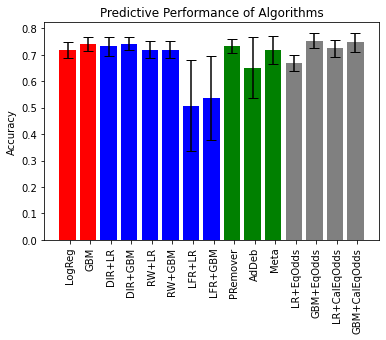

In [47]:
#ACCURACY

ind = np.arange(15)

width=0.2
# Plotting
plt.bar( ind, Accuracy,align='center', yerr= Accuracy_std,  ecolor='black', capsize=5, color=['r','r','b','b','b','b','b','b','g','g','g','gray','gray','gray','gray'])

plt.title('Predictive Performance of Algorithms') 
plt.ylabel('Accuracy')
xlabels= ['LogReg','GBM','DIR+LR','DIR+GBM','RW+LR','RW+GBM','LFR+LR','LFR+GBM','PRemover','AdDeb','Meta','LR+EqOdds','GBM+EqOdds','LR+CalEqOdds','GBM+CalEqOdds']

plt.xticks(ind + width / 2, xlabels, rotation= 'vertical' )

#plt.legend(bbox_to_anchor=(1, 1), ncol=2)
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/Accuracies.png',dpi=300, format='png', bbox_inches='tight')
plt.show()

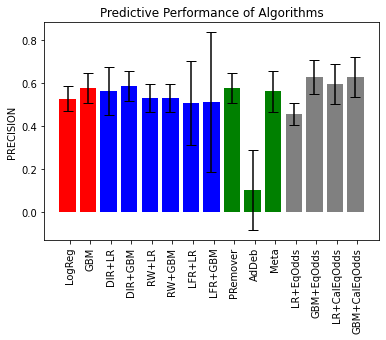

In [48]:
#ppv

ind = np.arange(15)

width=0.2
# Plotting
plt.bar( ind, PPV,align='center', yerr= PPV_std,  ecolor='black', capsize=5, color=['r','r','b','b','b','b','b','b','g','g','g','gray','gray','gray','gray'])

plt.title('Predictive Performance of Algorithms') 
plt.ylabel('PRECISION')
xlabels= ['LogReg','GBM','DIR+LR','DIR+GBM','RW+LR','RW+GBM','LFR+LR','LFR+GBM','PRemover','AdDeb','Meta','LR+EqOdds','GBM+EqOdds','LR+CalEqOdds','GBM+CalEqOdds']
plt.xticks(ind + width / 2, xlabels, rotation= 'vertical' )

#plt.legend(bbox_to_anchor=(1, 1), ncol=2)
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/PPV.png',dpi=300, format='png', bbox_inches='tight')
plt.show()

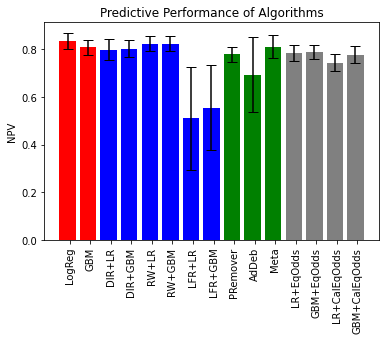

In [49]:
#ACCURACY

ind = np.arange(15)

width=0.2
# Plotting
plt.bar( ind, NPV,align='center', yerr= NPV_std,  ecolor='black', capsize=5, color=['r','r','b','b','b','b','b','b','g','g','g','gray','gray','gray','gray'])

plt.title('Predictive Performance of Algorithms') 
plt.ylabel('NPV')
xlabels= ['LogReg','GBM','DIR+LR','DIR+GBM','RW+LR','RW+GBM','LFR+LR','LFR+GBM','PRemover','AdDeb','Meta','LR+EqOdds','GBM+EqOdds','LR+CalEqOdds','GBM+CalEqOdds']
plt.xticks(ind + width / 2, xlabels, rotation= 'vertical' )

#plt.legend(bbox_to_anchor=(1, 1), ncol=2)
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/NPV.png',dpi=300, format='png', bbox_inches='tight')
plt.show()

## DI Impact, Consistency, and SP 

Comparing DI impact, Consistency, and Statistical Parity in Data, Baseline classifiers and Bias Mitigation Algorithms

In [50]:
DI= list([LR['DATA_DI'].to_numpy()[0],LR['DI'].to_numpy()[0], GBM['DI'].to_numpy()[0], LR_dir['DI'].to_numpy()[0],
                GBM_dir['DI'].to_numpy()[0],LR_rw['DI'].to_numpy()[0], GBM_rw['DI'].to_numpy()[0],
                LR_lfr['DI'].to_numpy()[0], GBM_lfr['DI'].to_numpy()[0], PR['DI'].to_numpy()[0],
                adDeb['DI'].to_numpy()[0],meta['DI'].to_numpy()[0],
                LR_EO['DI'].to_numpy()[0],GBM_EO['DI'].to_numpy()[0],LR_CalEO['DI'].to_numpy()[0],
                GBM_CalEO['DI'].to_numpy()[0]])

DI_std= list([LR_std['DATA_DI_std'].to_numpy()[0], LR_std['DI_std'].to_numpy()[0],GBM_std['DI_std'].to_numpy()[0], LR_dir_std['DI_std'].to_numpy()[0],
                GBM_dir_std['DI_std'].to_numpy()[0],LR_rw_std['DI_std'].to_numpy()[0], GBM_rw_std['DI_std'].to_numpy()[0],
                LR_lfr_std['DI_std'].to_numpy()[0], GBM_lfr_std['DI_std'].to_numpy()[0], PR_std['DI_std'].to_numpy()[0],
                adDeb_std['DI_std'].to_numpy()[0],meta_std['DI_std'].to_numpy()[0],
                LR_EO_std['DI_std'].to_numpy()[0],GBM_EO_std['DI_std'].to_numpy()[0],LR_CalEO_std['PPV_std'].to_numpy()[0],
                GBM_CalEO_std['DI_std'].to_numpy()[0]])


In [51]:
SP= list([LR['DATA_SP'].to_numpy()[0],LR['SP'].to_numpy()[0], GBM['SP'].to_numpy()[0], LR_dir['SP'].to_numpy()[0],
                GBM_dir['SP'].to_numpy()[0],LR_rw['SP'].to_numpy()[0], GBM_rw['SP'].to_numpy()[0],
                LR_lfr['SP'].to_numpy()[0], GBM_lfr['SP'].to_numpy()[0], PR['SP'].to_numpy()[0],
                adDeb['SP'].to_numpy()[0],meta['SP'].to_numpy()[0],
                LR_EO['SP'].to_numpy()[0],GBM_EO['SP'].to_numpy()[0],LR_CalEO['SP'].to_numpy()[0],
                GBM_CalEO['SP'].to_numpy()[0]])

SP_std= list([LR_std['DATA_SP_std'].to_numpy()[0], LR_std['SP_std'].to_numpy()[0],GBM_std['SP_std'].to_numpy()[0], LR_dir_std['SP_std'].to_numpy()[0],
                GBM_dir_std['SP_std'].to_numpy()[0],LR_rw_std['SP_std'].to_numpy()[0], GBM_rw_std['SP_std'].to_numpy()[0],
                LR_lfr_std['SP_std'].to_numpy()[0], GBM_lfr_std['SP_std'].to_numpy()[0], PR_std['SP_std'].to_numpy()[0],
                adDeb_std['SP_std'].to_numpy()[0],meta_std['SP_std'].to_numpy()[0],
                LR_EO_std['SP_std'].to_numpy()[0],GBM_EO_std['SP_std'].to_numpy()[0],LR_CalEO_std['PPV_std'].to_numpy()[0],
                GBM_CalEO_std['SP_std'].to_numpy()[0]])

In [52]:
CONSISTENCY= list([LR['DATA_CONS'].to_numpy()[0],LR['CONSISTENCY'].to_numpy()[0], GBM['CONSISTENCY'].to_numpy()[0], LR_dir['CONSISTENCY'].to_numpy()[0],
                GBM_dir['CONSISTENCY'].to_numpy()[0],LR_rw['CONSISTENCY'].to_numpy()[0], GBM_rw['CONSISTENCY'].to_numpy()[0],
                LR_lfr['CONSISTENCY'].to_numpy()[0], GBM_lfr['CONSISTENCY'].to_numpy()[0], PR['CONSISTENCY'].to_numpy()[0],
                adDeb['CONSISTENCY'].to_numpy()[0],meta['CONSISTENCY'].to_numpy()[0],
                LR_EO['CONSISTENCY'].to_numpy()[0],GBM_EO['CONSISTENCY'].to_numpy()[0],LR_CalEO['CONSISTENCY'].to_numpy()[0],
                GBM_CalEO['CONSISTENCY'].to_numpy()[0]])

CONSISTENCY_std= list([LR_std['DATA_CONS_std'].to_numpy()[0], LR_std['CONSISTENCY_std'].to_numpy()[0],GBM_std['CONSISTENCY_std'].to_numpy()[0], LR_dir_std['CONSISTENCY_std'].to_numpy()[0],
                GBM_dir_std['CONSISTENCY_std'].to_numpy()[0],LR_rw_std['CONSISTENCY_std'].to_numpy()[0], GBM_rw_std['CONSISTENCY_std'].to_numpy()[0],
                LR_lfr_std['CONSISTENCY_std'].to_numpy()[0], GBM_lfr_std['CONSISTENCY_std'].to_numpy()[0], PR_std['CONSISTENCY_std'].to_numpy()[0],
                adDeb_std['CONSISTENCY_std'].to_numpy()[0],meta_std['CONSISTENCY_std'].to_numpy()[0],
                LR_EO_std['CONSISTENCY_std'].to_numpy()[0],GBM_EO_std['CONSISTENCY_std'].to_numpy()[0],LR_CalEO_std['PPV_std'].to_numpy()[0],
                GBM_CalEO_std['CONSISTENCY_std'].to_numpy()[0]])

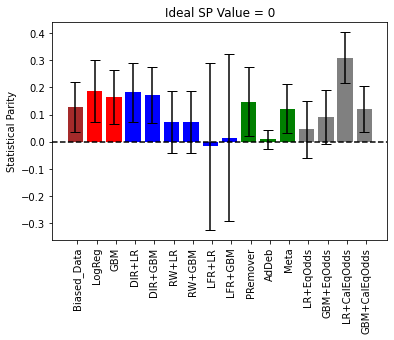

In [53]:
#Statistical Parity

ind = np.arange(16)

width=0.2
# Plotting
plt.bar( ind, SP,align='center', yerr= SP_std,  ecolor='black', capsize=5, color=['brown','r','r','b','b','b','b','b','b','g','g','g','gray','gray','gray','gray'])

plt.title('Ideal SP Value = 0') 
plt.ylabel('Statistical Parity')
xlabels= ['Biased_Data','LogReg','GBM','DIR+LR','DIR+GBM','RW+LR','RW+GBM','LFR+LR','LFR+GBM','PRemover','AdDeb','Meta','LR+EqOdds','GBM+EqOdds','LR+CalEqOdds','GBM+CalEqOdds']
plt.xticks(ind + width / 2, xlabels, rotation= 'vertical' )

plt.axhline(y=0, color= 'black',linestyle= '--')
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/SP.png',dpi=300, format='png', bbox_inches='tight')
plt.show()

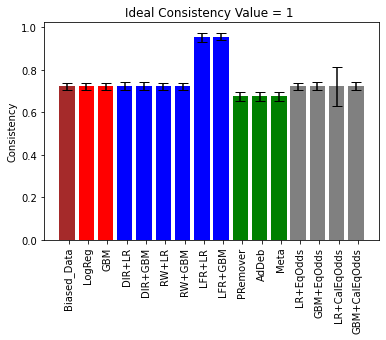

In [54]:
#Consistency

ind = np.arange(16)

width=0.2
# Plotting
plt.bar( ind, CONSISTENCY,align='center', yerr= CONSISTENCY_std,  ecolor='black', capsize=5, color=['brown','r','r','b','b','b','b','b','b','g','g','g','gray','gray','gray','gray'])

plt.title('Ideal Consistency Value = 1 ') 
plt.ylabel('Consistency')
xlabels= ['Biased_Data','LogReg','GBM','DIR+LR','DIR+GBM','RW+LR','RW+GBM','LFR+LR','LFR+GBM','PRemover','AdDeb','Meta','LR+EqOdds','GBM+EqOdds','LR+CalEqOdds','GBM+CalEqOdds']

plt.xticks(ind + width / 2, xlabels, rotation= 'vertical' )

#plt.axhline(y=0, color= 'black',linestyle= '--')
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/Consistency.png',dpi=300, format='png', bbox_inches='tight')
plt.show()

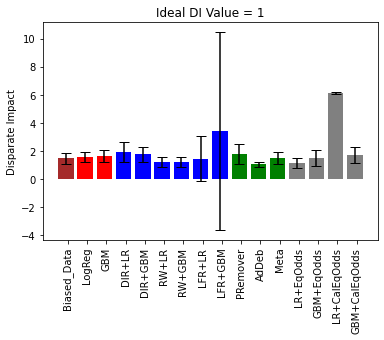

In [55]:
#Disparate Impact

ind = np.arange(16)

width=0.2
# Plotting
plt.bar( ind, DI,align='center', yerr= DI_std,  ecolor='black', capsize=5, color=['brown','r','r','b','b','b','b','b','b','g','g','g','gray','gray','gray','gray'])

plt.title('Ideal DI Value = 1') 
plt.ylabel('Disparate Impact')
xlabels= ['Biased_Data','LogReg','GBM','DIR+LR','DIR+GBM','RW+LR','RW+GBM','LFR+LR','LFR+GBM','PRemover','AdDeb','Meta','LR+EqOdds','GBM+EqOdds','LR+CalEqOdds','GBM+CalEqOdds']

plt.xticks(ind + width / 2, xlabels, rotation= 'vertical' )

#plt.axhline(y=0, color= 'black',linestyle= '--')
plt.savefig(r'/content/gdrive/MyDrive/Colab_Notebooks/FAIRNESS_SURVEY/images/German/DisparateIMpact.png',dpi=300, format='png', bbox_inches='tight')
plt.show()


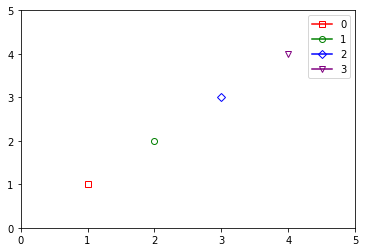

In [56]:
import matplotlib.pyplot as plt

Fig, ax = plt.subplots()
for i, (mark, color) in enumerate(zip(
    ['s', 'o', 'D', 'v'], ['r', 'g', 'b', 'purple'])):
    ax.plot(i+1, i+1, color=color,
            marker=mark,
            markerfacecolor='None',
            markeredgecolor=color,
            label=i)

ax.set_xlim(0,5)
ax.set_ylim(0,5)
ax.legend()
plt.show()